# Table of Contents: 

* **Project Overview.**
* **Importing Libraries.**<br><br>
* **1. Data Exploration:**
   * **1.1 Fill Necessary Data:**
     * 1.1.1 Fill the (2) missing values in (Embarked) in train dataset.<br>
     * 1.1.2 Fill the (1) missing value in (Fare) in test dataset.<br>
   * **1.2 Data Visiualization:**
     * **1.2.1 Categorical Features:**
       * 1.2.1.1 Sex.<br>
       * 1.2.1.2 Embarked.<br>
     * **1.2.2 Quantitative Features:**
       * 1.2.2.1 Pclass.
   * **1.3 Features Engineering:**
     * 1.3.1 Merge (SibSp) and (Parch) variables into one variable (Family).<br>
     * 1.3.2 Extract the titles from (Name) feature.<br>
     * 1.3.3 Transform categorical features to quantitative.<br>
     * 1.3.4 Predict the missing ages.
* **2. Modeling:**
  * 2.1 Logistic Regression.
  * 2.2 K-NN.<br>
  * 2.3 SVM.<br>
  * 2.4 Naive Bayes.<br>
  * 2.5 Random Forest.<br>
  * 2.6 XGBoost.
* **3. Final Prediction:**
  * 3.1 Predict Test Data Survival.<br>
  * 3.2 Create Submission File.

---

## Project Overview:

**Description:<br>**
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

**Goal:<br>**
It is your job to predict if a passenger survived the sinking of the Titanic or not. 
For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.

---

## Importing libraries:

In [3]:
# Importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

---

# 1. Data Exploration:

#### Now, we will start off by uploading training and test datasets and explore them.

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### From the above dataframe, we can begin by determining the categorical and quantitative features

### Categorical Features

* Ordinal: Ticket, Cabin
* Nominal: Name, Sex, Embarked

### Quantitative Features

* Discrete: Pclass, Family Members (SibSp + Parch)
* Continuous: Age, Fare

In [6]:
print(train.info())
print('-----------------------------------------------------------\n')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
-----------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ti

---

## 1.1 Fill Necessary Data:

From the above info summary, we can see that there are two missing "Fare" values in training dataset and one "Fare" in test dataset.

### 1.1.1. Fill the missing (Embarked) values in train dataset:

As for (Embarked), let's see which value is the dominant

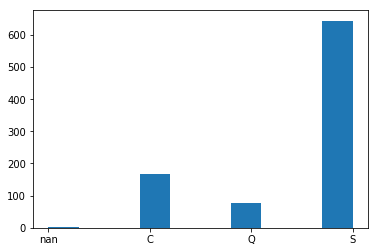

In [7]:
plt.hist(train['Embarked'])
plt.show()

##### It's obvious that Southampton "S" is the most repeated port of embarkation. So, we will replace the missing (Embarked) values with 'S'.

In [8]:
train['Embarked'] = train['Embarked'].fillna('S')

### 1.1.2. Fill the missing (Fare) value in test dataset:

We can replace the missing (Fare) value with the mean:

In [9]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())


---

# 1.2 Data Visiualization:

#### The features we will explore visually can be categorized as follows:

### 1.2.1. Categorical Features:
1. Sex.<br>
2. Embarked.

### 1.2.2. Quantitative Features:

1. Pclass.

In [10]:
# Create dataframe that holds survived passengers
survival = train[train['Survived'] == 1]

# Create dataframe for all observations with ages that are not null
train_with_age = train[train['Age'].notnull()]

# Preparing the standard sizes and background color
plt.rcParams['figure.figsize'] = 20, 5
sns.set_style('darkgrid')

#### Now, let's have a visual look over the different features:

## 1.2.1. Categorical Features:

## 1.2.1.1 Sex:

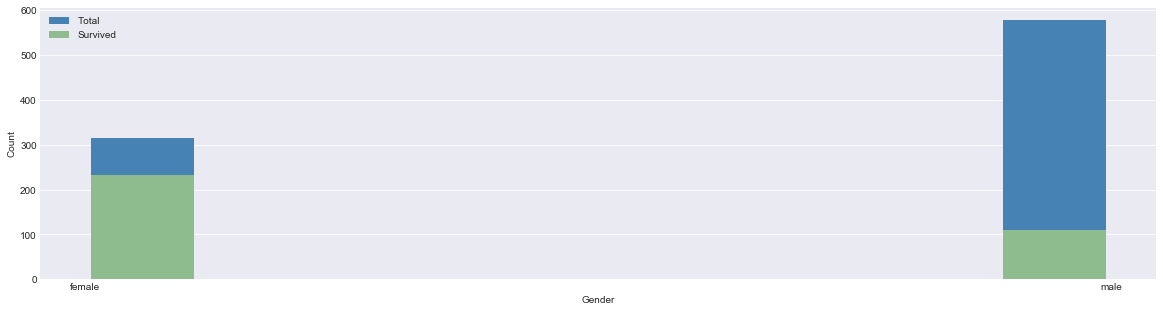

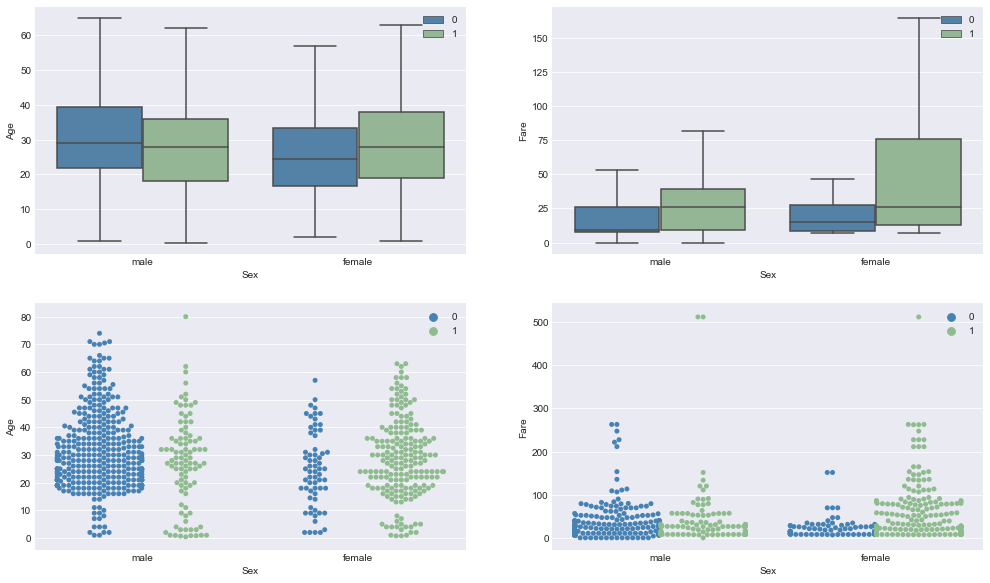

,Gender,Passengers,Survival
0,male,577,18.89 %
1,female,314,74.2 %


In [11]:
# Create dataframe to represent some basic statistics
gender_total = pd.DataFrame(columns=['Gender', 'Passengers', 'Survival'])

# Adding numbers to the above dataframe
for gender in ['male', 'female']:
    percentage = str(round(len(survival[survival['Sex'] == gender]) / len(train[train['Sex'] == gender]) * 100, 2))
    gender_total.loc[len(gender_total)] = gender, len(train[train['Sex'] == gender]), (percentage + ' %')

# Create histogram 
plt.hist(train['Sex'], bins=9, rwidth=0.9,  color = 'steelblue', label='Total')
plt.hist(survival['Sex'], bins=9, rwidth=0.9, color = 'darkseagreen', label='Survived')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(loc='upper left')
plt.grid(axis='x')

# Create comparison charts (Box and swarm plots)
f, axes = plt.subplots(2, 2, figsize=(17, 10))
a1 = sns.boxplot(x='Sex', y='Age', data=train_with_age, hue='Survived', palette=['steelblue','darkseagreen'], showfliers=False, ax=axes[0, 0])
a2 = sns.swarmplot(x='Sex', y='Age', data=train_with_age, hue='Survived', palette=['steelblue','darkseagreen'], dodge=True, ax=axes[1, 0])
a3 = sns.boxplot(x='Sex', y='Fare', data=train, hue='Survived', palette=['steelblue','darkseagreen'], showfliers=False, ax=axes[0, 1])
a4 = sns.swarmplot(x='Sex', y='Fare', data=train, hue='Survived',palette=['steelblue','darkseagreen'], dodge=True, ax=axes[1, 1])

# Create comparison charts (Box and swarm plots)
b1 = a1.legend(loc='upper right')
b2 = a2.legend(loc='upper right')
b3 = a3.legend(loc='upper right')
b4 = a4.legend(loc='upper right')

plt.show()
gender_total

### 1.2.1.1 Conclusion

From the above charts, we can notice that:<br><br>
1- Although the number of males was almost double the females, the percentage of females survival among total females is almost 4 times the percentage of males survival among total males. <br>
2- Most of the survived passengers were between 18 and 38 years old. <br>
3- Females who paid higher fare than the average were more likely to survive.

---

## 1.2.1.2 Embarked:

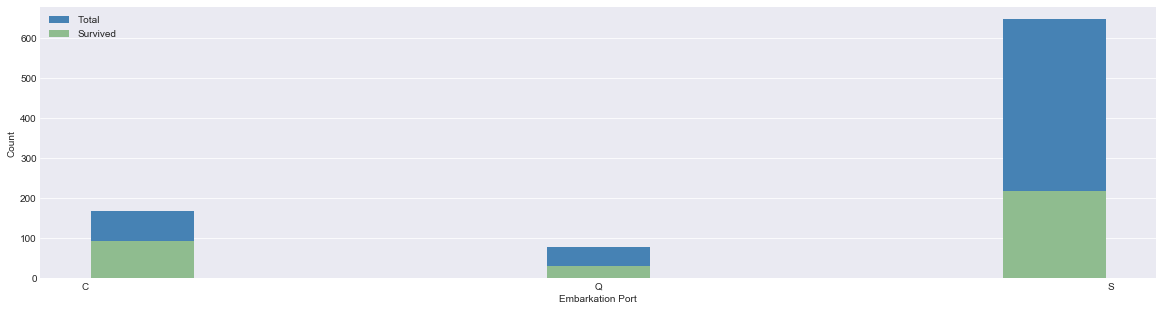

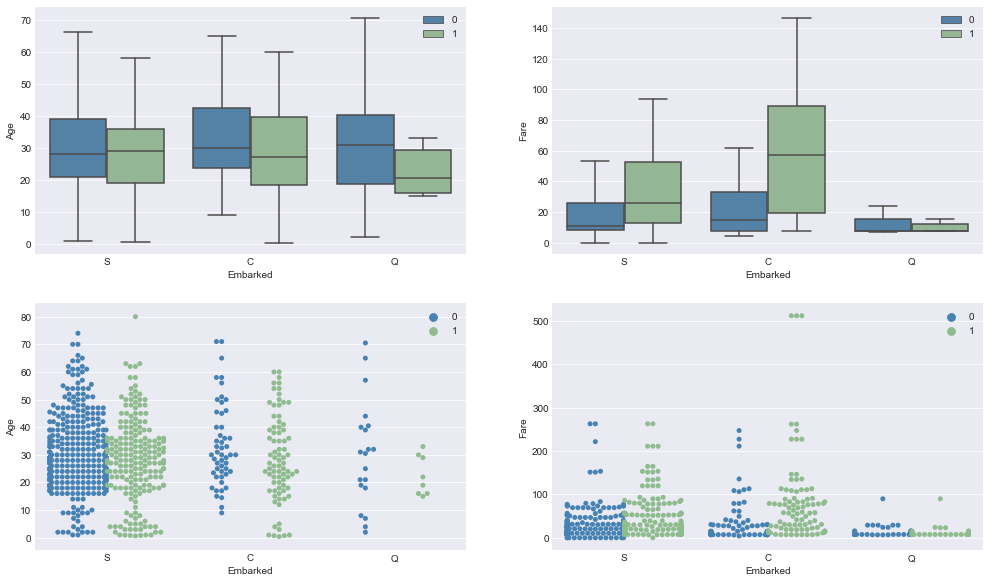

,Embarkation Port,Passengers,Port Survival,Port Survival (F),Port Survival (M)
0,C,168,55.36 %,38.1 %,17.26 %
1,Q,77,38.96 %,35.06 %,3.9 %
2,S,646,33.9 %,21.98 %,11.92 %


In [12]:
# Create dataframe to represent some basic statistics
embarkation_port = pd.DataFrame(columns=['Embarkation Port', 'Passengers', 'Port Survival', 'Port Survival (F)', 'Port Survival (M)'])

# Adding numbers to the above dataframe
for embark in ['C', 'Q', 'S']:
    percentage = str(round(len(survival[survival['Embarked'] == embark]) / len(train[train['Embarked'] == embark]) * 100, 2))
    female = str(round(len(survival[(survival['Embarked'] == embark) & (survival['Sex'] == 'female')]) / len(train[(train['Embarked'] == embark)]) * 100, 2))
    male = str(round(len(survival[(survival['Embarked'] == embark) & (survival['Sex'] == 'male')]) / len(train[(train['Embarked'] == embark)]) * 100, 2))
    embarkation_port.loc[len(embarkation_port)] = embark, len(train[train['Embarked'] == embark]), (percentage + ' %'), (female + ' %'), (male + ' %')

# Create histogram 
plt.hist(train['Embarked'], bins=9, rwidth=0.9,  color = 'steelblue', label='Total')
plt.hist(survival['Embarked'], bins=9, rwidth=0.9, color = 'darkseagreen', label='Survived')
plt.xlabel('Embarkation Port')
plt.ylabel('Count')
plt.legend(loc='upper left')
plt.grid(axis='x')

# Create comparison charts (Box and swarm plots)
f, axes = plt.subplots(2, 2, figsize=(17, 10))
a1 = sns.boxplot(x='Embarked', y='Age', data=train_with_age, hue='Survived', palette=['steelblue','darkseagreen'], showfliers=False, ax=axes[0, 0])
a2 = sns.swarmplot(x='Embarked', y='Age', data=train_with_age, hue='Survived', palette=['steelblue','darkseagreen'], dodge=True, ax=axes[1, 0])
a3 = sns.boxplot(x='Embarked', y='Fare', data=train, hue='Survived', palette=['steelblue','darkseagreen'], showfliers=False, ax=axes[0, 1])
a4 = sns.swarmplot(x='Embarked', y='Fare', data=train, hue='Survived',palette=['steelblue','darkseagreen'], dodge=True, ax=axes[1, 1])

# Adjust comparison charts' legends locations
b1 = a1.legend(loc='upper right')
b2 = a2.legend(loc='upper right')
b3 = a3.legend(loc='upper right')
b4 = a4.legend(loc='upper right')

plt.show()
display(embarkation_port)

### 1.2.1.2 Conclusion

From the above charts, we can notice that:<br><br>
1- Almost 75% of the passengers embarked from 'S' (Southampton).<br>
2- The highest surviving rate among embarkations' ports passengers was 'C' (Cherbourg), where 55% of 'C' passengers survived.<br>
3- Passengers who embarked from 'S' and 'C' and paid more than the average fare were more likely to survive.

---

## 1.2.2. Quantitative Features:

## 1.2.2.1 Pclass:

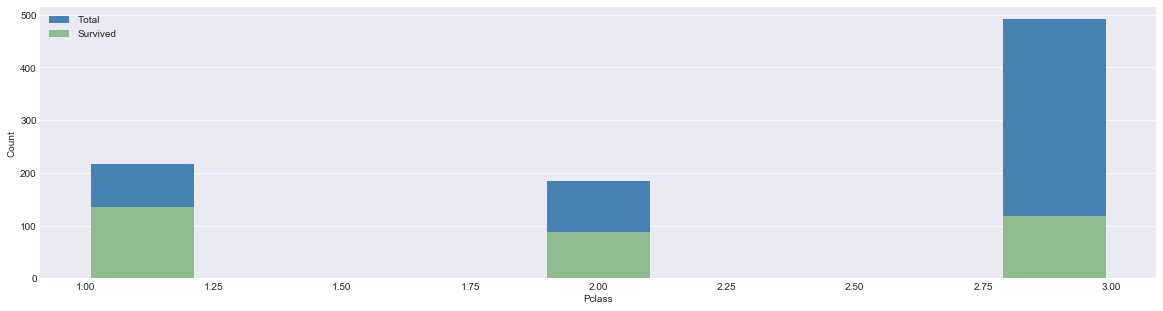

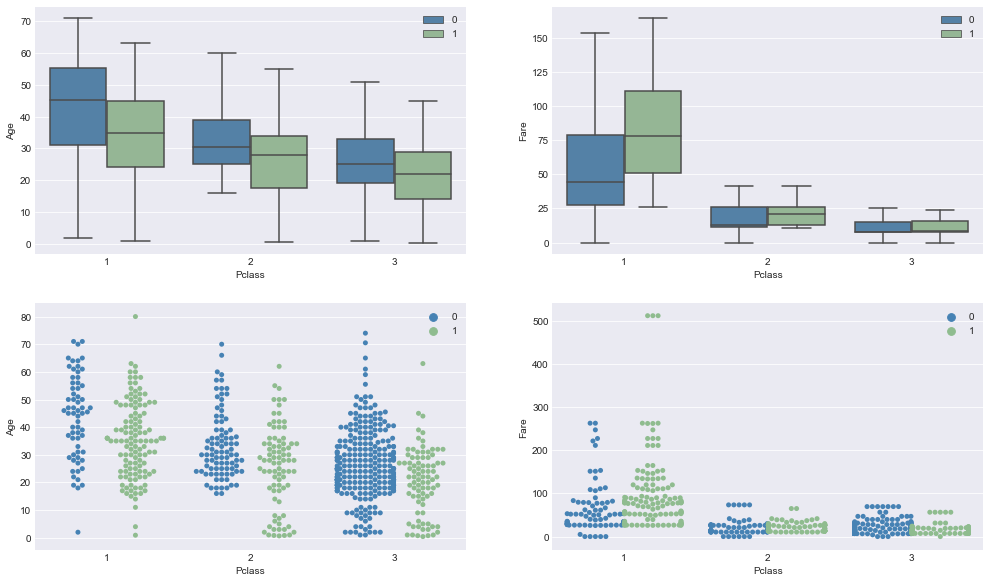

,Pclass,Passengers,Class Survival,Class Survival (F),Class Survival (M)
0,1,216,62.96 %,42.13 %,20.83 %
1,2,184,47.28 %,38.04 %,9.24 %
2,3,491,24.24 %,14.66 %,9.57 %


In [13]:
# Create dataframe to represent some basic statistics
p_class = pd.DataFrame(columns=['Pclass', 'Passengers', 'Class Survival', 'Class Survival (F)', 'Class Survival (M)'])

# Adding numbers to the above dataframe
for pclass in range(1, 4):
    percentage = str(round(len(survival[survival['Pclass'] == pclass]) / len(train[train['Pclass'] == pclass]) * 100, 2))
    female = str(round(len(survival[(survival['Pclass'] == pclass) & (survival['Sex'] == 'female')]) / len(train[(train['Pclass'] == pclass)]) * 100, 2))
    male = str(round(len(survival[(survival['Pclass'] == pclass) & (survival['Sex'] == 'male')]) / len(train[(train['Pclass'] == pclass)]) * 100, 2))
    p_class.loc[len(p_class)] = pclass, len(train[train['Pclass'] == pclass]), (percentage + ' %'), (female + ' %'), (male + ' %')

# Create histogram 
plt.hist(train['Pclass'], bins=9, rwidth=0.9,  color = 'steelblue', label='Total')
plt.hist(survival['Pclass'], bins=9, rwidth=0.9, color = 'darkseagreen', label='Survived')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(loc='upper left')
plt.grid(axis='x')

# Create comparison charts (Box and swarm plots)
f, axes = plt.subplots(2, 2, figsize=(17, 10))
a1 = sns.boxplot(x='Pclass', y='Age', data=train_with_age, hue='Survived', palette=['steelblue','darkseagreen'], showfliers=False, ax=axes[0, 0])
a2 = sns.swarmplot(x='Pclass', y='Age', data=train_with_age, hue='Survived', palette=['steelblue','darkseagreen'], dodge=True, ax=axes[1, 0])
a3 = sns.boxplot(x='Pclass', y='Fare', data=train, hue='Survived', palette=['steelblue','darkseagreen'], showfliers=False, ax=axes[0, 1])
a4 = sns.swarmplot(x='Pclass', y='Fare', data=train, hue='Survived',palette=['steelblue','darkseagreen'], dodge=True, ax=axes[1, 1])

# Create comparison charts (Box and swarm plots)
b1 = a1.legend(loc='upper right')
b2 = a2.legend(loc='upper right')
b3 = a3.legend(loc='upper right')
b4 = a4.legend(loc='upper right')

plt.show()
display(p_class)

### 1.2.2.1 Conclusion

From the above charts, we can notice that:<br><br>
1- More than 50% of the passengers were 3rd class.<br>
2- Between all classes, 1st class was the highest in terms of survival among their passengers (63%).<br>
3- The average age and fare of survived passengers in 1st class were higher than the other classes.

---

### 1.2. Data Visualization Summary:

By visualizing the relationship between different features, we can come up with:

1- Gender had a great influence on determining the surviving likelihood. <br>
2- Most of the survived passengers were between 20 and 38 years old. <br>
3- High fare passengers survival was higher than average fare passengers.<br>
4- The highest surviving rate among embarkations' ports passengers was 'C' (Cherbourg), where 55% of 'C' passengers survived.<br>
5- Passengers who embarked from 'S' and 'C' and paid more than the average fare were more likely to survive.<br>
6- More than 50% of the passengers were 3rd class.<br>
7- Between all classes, 1st class was the highest in terms of survival among their passengers (63%).<br>
8- The average age and fare of survived passengers in 1st class were higher than the other classes.

---

# 1.3. Features Engineering:

After having a quick look over the data through the above tables and charts, we will notice that we need to:<br>
1. Merge (SibSp) and (Parch) variables into one variable (Family) "to decrease the number of features to avoid the curse of dimensionality".<br>
2. Extract the titles from (Name) feature.<br>
3. Transform categorical features to quantitative to prevent overfitting.<br>
4. Predict the missing ages.<br>

---

### 1.3.1. Merge (SibSp) and (Parch) variables into one variable (Family):

To better prepare the data, we can combine both features ('SibSp' and 'Parch') under one variable (let's name it 'Family') to decrease the number of features in order to avoid the curse of dimensionality.

In [14]:
train['Family'] = train['SibSp'] + train['Parch']
test['Family'] = test['SibSp'] + test['Parch']

---

### 1.3.2. Extract the titles from (Name) feature:

In [15]:
# Merging both datasets (train and test) data
combined = [train, test]

# Loop over each observation to extract the title from the name
for dataset in combined:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
# Now, let's have a look on which titles were more likely to survive.
pd.crosstab(train['Title'], train[train['Survived'] == 1]['Survived'])

Survived,1
Title,
Col,1
Countess,1
Dr,3
Lady,1
Major,1
Master,23
Miss,127
Mlle,2
Mme,1


<br>The above results demonstrate the survival of each title. Since the title can be important in the prediction of the survival, we need to decrease the number of classes (titles) to avoid creating too many columns when applying one hot encoder (decrease the number of columns to avoid the curse of dimensionality).<br><br>

In [16]:
# Aggregating the unfrequented titles under (Others)
for dataset in combined:
    dataset['Title'] = dataset['Title'].replace(['Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], 'Others')

# Merging the datasets (train & test) again after the previous amendments
combine = pd.concat(combined, ignore_index=True)

### 1.3.3. Transform categorical features to quantitative:

In [17]:
for dataset in combined:
    dataset['Sex'] = dataset['Sex'].map( {'male': 0, 'female': 1} ).astype(int)
    
for dataset in combined:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

for dataset in combined:
    dataset['Title'] = dataset['Title'].map( {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Others': 5} ).astype(int)
    
combine = pd.concat(combined, ignore_index=True)

---

### 1.3.4. Predict the missing ages:

##### First, we will group fares into 30 bins to make the prediction of missing ages easier and avoid overfitting as much as we can.

In [18]:
for dataset in combined:
    # Setting counter to mark each "Fare" group with a specific number
    counter = 0
    
    # Grouping "Fares" below 5 dollars
    dataset.loc[dataset['Fare'] <= 5, 'Fare'] = counter
    counter += 1
    
    # Grouping "Fares" between 5 and 30 dollars
    for number in range(5, 30, 5):
        dataset.loc[(dataset['Fare'] > number) & (dataset['Fare'] <= (number + 5)), 'Fare'] = counter
        counter += 1
                                  
    # Grouping "Fares" between 30 and 200 dollars
    for number in range(30, 200, 10):
        dataset.loc[(dataset['Fare'] > number) & (dataset['Fare'] <= (number + 10)), 'Fare'] = counter
        counter += 1
                                        
    # Grouping "Fares" between 200 and 300 dollars
    for number in range(200, 300, 20):
        dataset.loc[(dataset['Fare'] > number) & (dataset['Fare'] <= (number + 20)), 'Fare'] = counter
        counter += 1

    # Grouping "Fares" between 300 and 400 dollars
    for number in range(300, 400, 50):
        dataset.loc[(dataset['Fare'] > number) & (dataset['Fare'] <= (number + 50)), 'Fare'] = counter
        counter += 1
                        
    # Grouping "Fares" above 400 dollars
    dataset.loc[(dataset['Fare'] > 400), 'Fare'] = counter

##### We can do the same grouping task also with "Age" (group it within 8 bins).

In [19]:
for dataset in combined:
    # Setting counter to mark each "Age" group with a specific number
    counter = 0

    # Grouping "Ages" below 10 years
    dataset.loc[ dataset['Age'] <= 10, 'Age'] = counter
    counter += 1

    # Grouping "Ages" between 10 and 80 years
    for number in range(10, 80, 10):
        dataset.loc[(dataset['Age'] > number) & (dataset['Age'] <= (number + 10)), 'Age'] = counter
        counter += 1

##### After that, we will run XGBoost to predict missing ages (the below hyperparameters are the result of running few iterations of Grid Search (outside this notebook) to optimize the hyperparameters used with XGBoost).

In [20]:
combine = pd.concat(combined, ignore_index=True)

# Creating predictors (X_train) and dependent (y_train) dataframes containing all observations with existing ages
X_train = combine[combine['Age'].notnull()].loc[:, ['Embarked', 'Family', 'Fare', 'Pclass', 'Sex', 'Title']].values
y_train = combine[combine['Age'].notnull()].loc[:, 'Age'].values

# Creating classifier object using XGBoost
classifier = XGBClassifier(colsample_bytree=0.34, learning_rate=0.1, max_depth=3, min_child_weight=5.01, 
    n_estimators=105, reg_lambda=0.000001, subsample=0.6)

# Fitting the classifier
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.34, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=5.01, missing=None, n_estimators=105,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1e-06, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.6)

##### Now, let's predict the missing ages and update train and test dataframes with the predictions.

In [21]:
# Creating predictors dataframe containing all observations with missing ages
X_age = combine[combine['Age'].isnull()].loc[:, ['Embarked', 'Family', 'Fare', 'Pclass', 'Sex', 'Title']].values

# Predicting missing ages
X_prediction = classifier.predict(X_age)

# Adding the related (PassengerIDs) for all of the missing ages to be able to locate them in the training and test dataframes and replace the corresponding missing ages.
PassengerId = combine[combine['Age'].isnull()].iloc[:, 7].values

for id in (range(0, len(PassengerId))):
    # Looping through the missing ages in train dataframe and replace them with the corresponding predictions obtained from the random forest model. 
    for row in range(0, len(train)):
        if train.iloc[row, 0] == PassengerId[id]:
            train.iloc[row, 5] = X_prediction[id]

    # Looping through the missing ages in test dataframe and replace them with the corresponding predictions obtained from the random forest model.
    for row in range(0, len(test)):
        if test.iloc[row, 0] == PassengerId[id]:
            test.iloc[row, 4] = X_prediction[id]

combine = pd.concat(combined, ignore_index=True)

---

# 2. Modeling:

We will try the below algorithms and see which one will become the best classification model according to the obtained accuracy:<br><br>
2.1. Logistic Regression.<br>
2.2. K-NN.<br>
2.3. SVM.<br>
2.4. Naive Bayes.<br>
2.5. Random Forest.<br>
2.6. XGBoost.<br>

First, we will start off by preparing our predictors, dependent variables and create function to help us checking the best hyperparameters for different algorithms using Grid Search.

In [22]:
# Create X, y vectors.
X_train = train.loc[:, ['Embarked', 'Sex', 'Title', 'Pclass', 'Age', 'Fare', 'Family']].values
y_train = train.loc[:, 'Survived'].values

# Create a dataframe that will hold each model's prediction accuracy calculated using cross validation.
accuracy_dataframe = pd.DataFrame(columns=['Model', 'K_Fold_Score'])

# Create function to check the best hyperparameters for each algorithm
def checker (algo, parameters, x, y):
    grid_search = GridSearchCV(estimator = algo, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
    grid_search = grid_search.fit(x, y)
    
    # summarize the result
    print("\nBest score is: %.2f %s using %s\n" % ((round((grid_search.best_score_) * 100, 2)), '%', grid_search.best_params_))

---

## 2.1 Logistic Regression:

### Determine the best hyperparameters to be used:

In [23]:
parameters = dict(C= [i/10 for i in range(1, 31)], solver= ['newton-cg', 'lbfgs', 'liblinear'])
checker(LogisticRegression(), parameters, X_train, y_train)


Best score is: 81.59 % using {'C': 0.2, 'solver': 'newton-cg'}



### Fitting the algorithm:

In [24]:
# Fitting Logistic Regression to the Training set.
classifier = LogisticRegression(C = 0.2, solver='newton-cg')
classifier.fit(X_train, y_train)

# Applying K-Fold Cross Validation.
accuracy = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
K_fold = str(round((accuracy.mean() * 100), 2))

# Adding the name of the model and K_fold result to the accuracy_dataframe
accuracy_dataframe.loc[len(accuracy_dataframe)] = 'Logistic Regression', (K_fold + ' %')


---

## 2.2 K-NN:

### Determine the best hyperparameters to be used:

In [25]:
parameters = dict(n_neighbors = range(1,51), metric = ['euclidean', 'manhattan', 'chebyshev', 'minkowski'], p=[1, 2])
checker(KNeighborsClassifier(), parameters, X_train, y_train)


Best score is: 82.27 % using {'metric': 'manhattan', 'n_neighbors': 32, 'p': 1}



### Fitting the algorithm:

In [26]:
# Fitting the classifier to the Training set
classifier = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 32, p = 1)
classifier.fit(X_train, y_train)

# Applying K-Fold Cross Validation
accuracy = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
K_fold = str(round((accuracy.mean() * 100), 2))

# Adding the name of the model and K_fold result to the accuracy_dataframe
accuracy_dataframe.loc[len(accuracy_dataframe)] = 'K-NN', (K_fold + ' %')

---

## 2.3 SVM:

### Determine the best hyperparameters to be used:

In [27]:
parameters = dict(C = [i/100 for i in range(100, 131)], kernel = ['linear', 'rbf', 'sigmoid'], gamma = [0.01, 0.1, 1])
checker(SVC(), parameters, X_train, y_train)


Best score is: 82.38 % using {'C': 1.19, 'gamma': 0.1, 'kernel': 'rbf'}



### Fitting the algorithm:

In [28]:
# Fitting SVM to the Training set
classifier = SVC( C=1.19, gamma=0.1, kernel = 'rbf')
classifier.fit(X_train, y_train)

# Applying K-Fold Cross Validation
accuracy = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
K_fold = str(round((accuracy.mean() * 100), 2))

# Adding the name of the model and K_fold result to the accuracy_dataframe
accuracy_dataframe.loc[len(accuracy_dataframe)] = 'SVM', (K_fold + ' %')

---

## 2.4 Naive Bayes:

### Fitting the algorithm:

In [29]:
# Fitting Naive Bayes to the Training set
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Applying K-Fold Cross Validation
accuracy = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
K_fold = str(round((accuracy.mean() * 100), 2))

# Adding the name of the model and K_fold result to the accuracy_dataframe
accuracy_dataframe.loc[len(accuracy_dataframe)] = 'Naive Bayesn', (K_fold + ' %')

---

## 2.5 Random Forest:

### Determine the best hyperparameters to be used:

In [30]:
parameters = dict(n_estimators=range(60, 76), criterion = ['gini', 'entropy'], max_depth = range(4, 7), random_state=[3])
checker(RandomForestClassifier(), parameters, X_train, y_train)


Best score is: 83.05 % using {'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 61, 'random_state': 3}



### Fitting the algorithm:

In [31]:
# Fitting Random Forest to the Training set (The below hyperparameters were the result of the Grid Search if grid search was running on Spyder)
classifier = RandomForestClassifier(criterion = 'entropy', max_depth=4, n_estimators = 61, random_state=3)
classifier.fit(X_train, y_train)

# Applying K-Fold Cross Validation
accuracy = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
K_fold = str(round((accuracy.mean() * 100), 2))

# Adding the name of the model and K_fold result to the accuracy_dataframe
accuracy_dataframe.loc[len(accuracy_dataframe)] = 'Random Forest', (K_fold + ' %')

---

## 2.6 XGBoost:

### Determine the best hyperparameters to be used:

In [32]:
parameters = dict(n_estimators=range(80, 101), learning_rate=[0.01],
max_depth=[3], gamma = [0.00001], subsample=[i/10 for i in range(3, 8)], colsample_bytree=[i/10 for i in range(8, 11)],
            reg_lambda=[0.000001])
checker(XGBClassifier(), parameters, X_train, y_train)


Best score is: 83.39 % using {'colsample_bytree': 0.8, 'gamma': 1e-05, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 80, 'reg_lambda': 1e-06, 'subsample': 0.3}



### Fitting the algorithm:

In [33]:
# Fitting Random Forest to the Training set (The below hyperparameters were the result of the Grid Search if grid search was running on Spyder)
classifier = XGBClassifier(colsample_bytree=0.8, gamma=1e-05, learning_rate=0.01, max_depth=3, n_estimators=89, 
                          reg_lambda=1e-06, subsample=0.6)
classifier.fit(X_train, y_train)

# Applying K-Fold Cross Validation
accuracy = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
K_fold = str(round((accuracy.mean() * 100), 2))

# Adding the name of the model and K_fold result to the accuracy_dataframe
accuracy_dataframe.loc[len(accuracy_dataframe)] = 'XGBoost', (K_fold + ' %')

---

### Now, let's have a look on the scores for each model ranked from highest to lowest:

In [34]:
accuracy_dataframe = accuracy_dataframe.sort_values(['K_Fold_Score'], ascending=False)
accuracy_dataframe.reset_index(drop=True)


,Model,K_Fold_Score
0,XGBoost,83.39 %
1,Random Forest,83.05 %
2,SVM,82.38 %
3,K-NN,82.28 %
4,Logistic Regression,81.6 %
5,Naive Bayesn,79.91 %


##### It seems that XGBoost is one of the best classifiers to go on with.

---

# 3. Final Prediction:

### 3.1 Predict Test Data Survival:

In [35]:
# Predicting the test data
test_dataset = test.loc[:, ['Embarked', 'Sex', 'Title', 'Pclass', 'Age', 'Fare', 'Family']].values

# Predict the survival of test dataset
prediction = {'PassengerId': test['PassengerId'], 'Survived': classifier.predict(test_dataset)}

### 3.2 Create Submission File:

In [36]:
# Creating prediction file
solution = pd.DataFrame(prediction)
solution.to_csv('Final_Solution.csv', index=False)

#### The above prediction scored (0.79425) on Kaggle's public leadership board.